# Data Cleaning

This is a template notebook for data cleaning. It can be used in combination with the data_quality_report template to get suggestions for data cleaning as well as to control your cleaning steps.

Author: {{ cookiecutter.author_name }}
Created: {{ cookiecutter.timestamp }}


In [1]:
# Link to project experiments folder hypothesis_experiment_learnings.board (refresh and hit enter on this line to see the link)

## How to use the notebook

The following cells:
- import the data,
- perform Data Cleaning,
    - Slice of the dataframe
    - Select specific columns
    - Standardise data types
    - remove duplicated rows and columns
    - remove manually seleted rows and columns
- perform data tuning
    - Standardise row/column names
    - Delete or augment missing data/rows
    - Plot percentile based outlier detection
- perform Data Transformation and Enrichment,
    - Encoding (Label/One-hot)
    - Aggregating
    - Binning
    - Regularisation
    - Dimensionality Reduction
    - Feature Selection
    - Consecutive usable time ranges (for time-series)

By default, the notebook is set up to run with an example (Daily Delhi Climate). To see how it works, run the notebook without changing the code.

For your project, adjust the code in the linked cells with your methods and then execute cells in the order you wish to process your data.

Please refer to data_cleaning.board for detailed instructions. The headers in this notebook follow the cards on the board.

### Imports and general setup

In [2]:
import numpy as np
import pandas as pd

from modules.modules import *

## 2. Import the Data

In [3]:
# Default example file
# <halerium id="0a108c03-e2b5-4520-8601-0e62584fe8a4">
path = 'https://raw.githubusercontent.com/erium/halerium-example-data/main/data_preparation/DailyDelhiClimateTrainMissing.csv'
datetime_col = 'date' # Column name for datetime column. None if there is no datetime
# </halerium id="0a108c03-e2b5-4520-8601-0e62584fe8a4">

In [4]:
df = Importer.import_data(path, datetime_col)

Visualise the imported data

In [5]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-02-01,7.400000,92.000000,2.980000,1017.800000
2013-03-01,7.166667,87.000000,4.633333,1018.666667
2013-04-01,8.666667,71.333333,1.233333,1017.166667
2013-05-01,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,NaN,87.857143,6.000000,1016.904762
2016-12-30,14.095238,NaN,6.266667,1017.904762


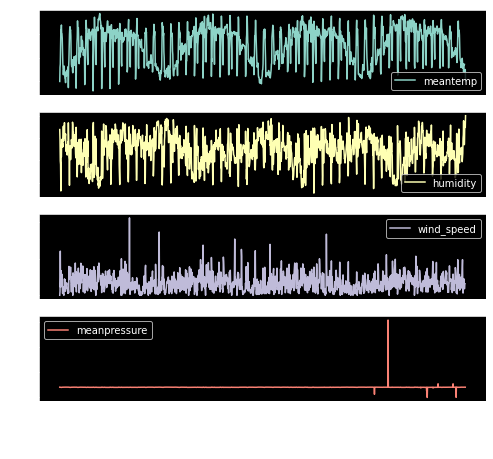

In [6]:
Plotter.plot_line(df)

## 3. Data Cleaning

### 3.1 Use slice of dataframe

In [7]:
# <halerium id="02e67e29-bbd9-4cd9-8231-7aa456c69291">
slice_indexes = [("Full", ('2013-01-01', '2017-01-01'))] # Tuples of (Slice name, (index ranges)) for different slices; example data contains only 1 slice
label_or_position = 'label' # 'label' for label indexes or 'position' for integer 0-based position indexing
# </halerium id="02e67e29-bbd9-4cd9-8231-7aa456c69291">

slices = PopulationSeparator.separate_populations(df, slice_indexes, label_or_position)
list(slices.keys())

['Full']

Select a slice for further use

In [8]:
# <halerium id="02e67e29-bbd9-4cd9-8231-7aa456c69291">
df = slices["Full"]
# </halerium id="02e67e29-bbd9-4cd9-8231-7aa456c69291">
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-02-01,7.400000,92.000000,2.980000,1017.800000
2013-03-01,7.166667,87.000000,4.633333,1018.666667
2013-04-01,8.666667,71.333333,1.233333,1017.166667
2013-05-01,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,NaN,87.857143,6.000000,1016.904762
2016-12-30,14.095238,NaN,6.266667,1017.904762


### 3.2 Only keep specific columns

In [9]:
# possible columns:
df.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [10]:
# <halerium id="29a9c302-9106-46d9-b1b7-91510a813220">
columns_to_keep = 'all' # list of column names (string) that should be kept. If columns_to_keep = 'all', all columns will be kept
# </halerium id="29a9c302-9106-46d9-b1b7-91510a813220">
df = ColumnPicker.keep_specific_columns(df, columns_to_keep)

### 3.3 Type handling

Standardize types. If a column is not specified, it will not be standardized.

In [11]:
# <halerium id="0f82b690-d489-4538-874a-892124f259c9">
column_types = {'meantemp': float, 'humidity': float, 'wind_speed': float, 'meanpressure': float}  # Pandas dtype: 'int', 'float', 'boolean', 'string'...
# </halerium id="0f82b690-d489-4538-874a-892124f259c9">

df = Standardizer.standardize_datatype(df, column_types)
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-02-01,7.400000,92.000000,2.980000,1017.800000
2013-03-01,7.166667,87.000000,4.633333,1018.666667
2013-04-01,8.666667,71.333333,1.233333,1017.166667
2013-05-01,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,NaN,87.857143,6.000000,1016.904762
2016-12-30,14.095238,NaN,6.266667,1017.904762


If that was not possible, i.e. raised an error: use the following cell, which only keeps rows where values have correct types and deleted the rest

In [12]:
df = Standardizer.remove_invalid_types(df, column_types)
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-02-01,7.400000,92.000000,2.980000,1017.800000
2013-03-01,7.166667,87.000000,4.633333,1018.666667
2013-04-01,8.666667,71.333333,1.233333,1017.166667
2013-05-01,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,NaN,87.857143,6.000000,1016.904762
2016-12-30,14.095238,NaN,6.266667,1017.904762


### 3.4 Remove duplicated rows & columns

In [13]:
# <halerium id="22a7e02e-b06d-49bd-a34d-d46b203e6f34">
# remove duplicated rows
df = df.drop_duplicates()
# remove duplicated columns
df = df.T.drop_duplicates().T
# </halerium id="22a7e02e-b06d-49bd-a34d-d46b203e6f34">

### 3.5 Manually remove rows and columns

remove columns by name

In [14]:
# <halerium id="bcf250b5-3e4a-4f75-845a-be68f6107aaa">
to_be_deleted_columnnames = [] # list of column names (string) of the to be deleted columns
# </halerium id="bcf250b5-3e4a-4f75-845a-be68f6107aaa">
df = df.drop(to_be_deleted_columnnames, axis=1)

remove columns by index

In [15]:
# <halerium id="bcf250b5-3e4a-4f75-845a-be68f6107aaa">
to_be_deleted_columnindices = [] # list of indices (integer values) of to be deleted columns
# </halerium id="bcf250b5-3e4a-4f75-845a-be68f6107aaa">
df = df.drop(df.columns[to_be_deleted_columnindices], axis = 1)

remove rows by index

In [16]:
# <halerium id="bcf250b5-3e4a-4f75-845a-be68f6107aaa">
to_be_deleted_indices = []
# </halerium id="bcf250b5-3e4a-4f75-845a-be68f6107aaa">
df = df.drop(to_be_deleted_indices)

remove rows based on column value

In [17]:
# <halerium id="bcf250b5-3e4a-4f75-845a-be68f6107aaa">
column = 'meantemp' # define column in which to-be-deleted values are found
to_be_deleted_values = [] # define list of values (multiple types possible) in that columns, of which the entire row should be deleted
# </halerium id="bcf250b5-3e4a-4f75-845a-be68f6107aaa">
df = df[~df[column].isin(to_be_deleted_values)]

## 4. Data Tuning

#### 4.1 Stadardize column names

In [18]:
# <halerium id="70169b7a-842e-4285-9d13-48f6019ec3a3">
def rename_col_function(col_name): # Define a function to modify the column name
    col_name = col_name.replace("_", "")
    col_name = col_name.lower()
    return col_name
# </halerium id="70169b7a-842e-4285-9d13-48f6019ec3a3">

df = Standardizer.standardize_column_names(df, rename_col_function)
df

,meantemp,humidity,windspeed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-02-01,7.400000,92.000000,2.980000,1017.800000
2013-03-01,7.166667,87.000000,4.633333,1018.666667
2013-04-01,8.666667,71.333333,1.233333,1017.166667
2013-05-01,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,NaN,87.857143,6.000000,1016.904762
2016-12-30,14.095238,NaN,6.266667,1017.904762


#### 4.2 Missing values

In [19]:
# <halerium id="208b9d84-2b3d-4a98-aa41-b860f2190ff1">
method = 'mean' # 'delete', 'zero', 'custom', 'mean', 'median', 'mode', 'linear', 'knn', 'interpolate', 'encode'
custom_value = 'None' # Custom value if method == 'custom'
# </halerium id="208b9d84-2b3d-4a98-aa41-b860f2190ff1">
# Note: 'mean', 'median', and 'interpolate' do not work on missing categorical values (implies cardinality)
df = MissingValues.handle_missing(df, method, custom_value)
df

Number of missing cells: 4
Number of missing cells remaining: 0


,meantemp,humidity,windspeed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-02-01,7.400000,92.000000,2.980000,1017.800000
2013-03-01,7.166667,87.000000,4.633333,1018.666667
2013-04-01,8.666667,71.333333,1.233333,1017.166667
2013-05-01,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,25.502541,87.857143,6.000000,1016.904762
2016-12-30,14.095238,60.751924,6.266667,1017.904762


#### 4.3 Outliers

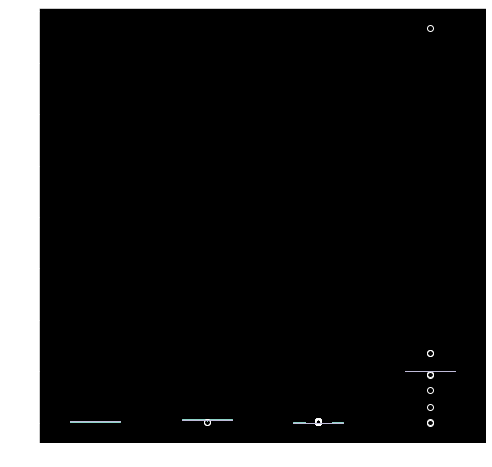

In [20]:
Plotter.plot_box(df)

Outliers found: 58


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


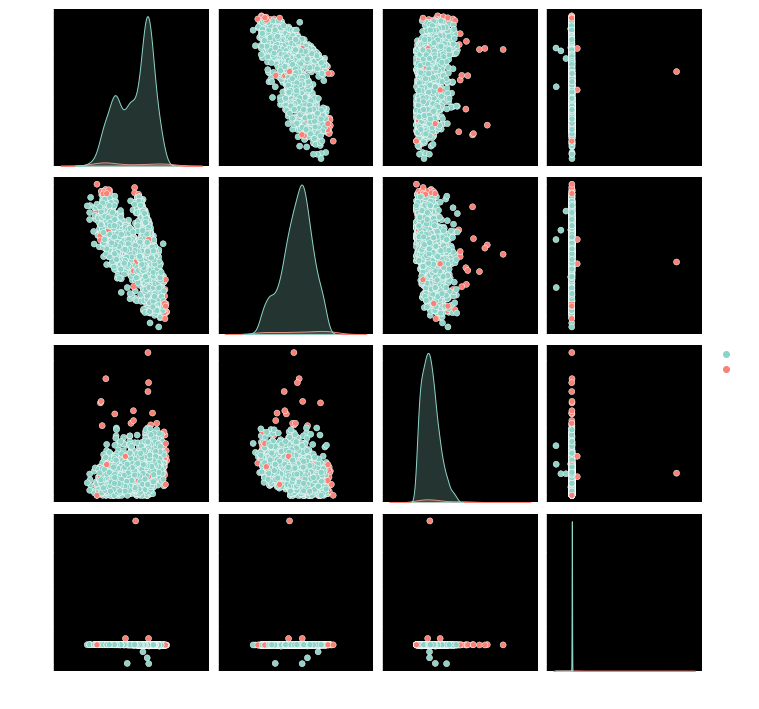

,meantemp,humidity,windspeed,meanpressure
date,,,,
2013-05-24,38.428571,27.428571,11.385714,996.428571
2013-05-25,38.714286,22.428571,10.314286,998.142857
2013-05-26,37.800000,21.200000,10.740000,998.200000
2014-07-06,38.500000,22.750000,13.187500,994.000000
2014-08-06,37.625000,26.250000,6.725000,993.125000
2014-09-06,37.875000,32.125000,6.025000,993.125000
2014-11-06,37.625000,23.125000,14.812500,995.625000
2014-06-20,38.000000,36.125000,17.825000,991.375000
2015-05-25,37.750000,22.250000,10.875000,996.875000


In [21]:
# <halerium id="c8f3911e-b463-4384-a35b-5c975c3b5eb5">
percentile = 0.99 # Specify outlier detection percentile threshold
upper_or_lower = 'upper' # 'upper' or 'lower' points exceeding percentile
features = df.columns  # Specify columns to detect outliers on
# </halerium id="c8f3911e-b463-4384-a35b-5c975c3b5eb5">

outliers = Outliers.find_outliers(percentile, upper_or_lower, df[features])
Plotter.show_outliers(df, outliers)
outliers

Remove outliers

In [22]:
df = Outliers.remove_outliers(df, outliers)
df

,meantemp,humidity,windspeed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-02-01,7.400000,92.000000,2.980000,1017.800000
2013-03-01,7.166667,87.000000,4.633333,1018.666667
2013-04-01,8.666667,71.333333,1.233333,1017.166667
2013-05-01,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-27,16.850000,67.550000,8.335000,1017.200000
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,25.502541,87.857143,6.000000,1016.904762


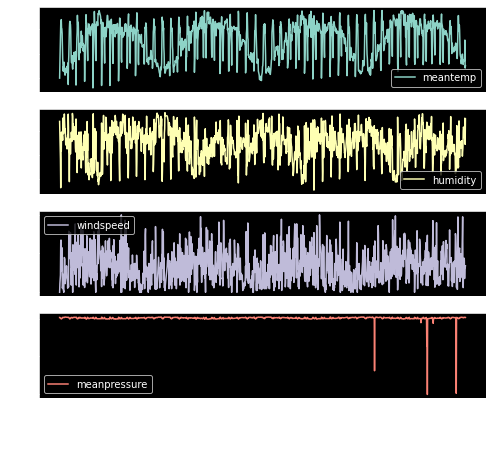

In [23]:
Plotter.plot_line(df)

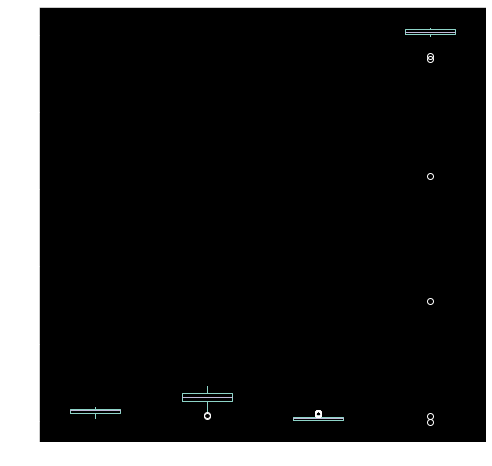

In [24]:
Plotter.plot_box(df)

## 5. Data Transformation and Enrichment

#### 5.1 Encoding

In [25]:
# <halerium id="6c0ed4e8-8d70-48ad-94b1-f74dcbb0167d">
one_hot_threshold = 10 # Threshold to switch to label encoding
# </halerium id="6c0ed4e8-8d70-48ad-94b1-f74dcbb0167d">
df = Encoder.encode(df, one_hot_threshold)
df

,meantemp,humidity,windspeed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-02-01,7.400000,92.000000,2.980000,1017.800000
2013-03-01,7.166667,87.000000,4.633333,1018.666667
2013-04-01,8.666667,71.333333,1.233333,1017.166667
2013-05-01,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-27,16.850000,67.550000,8.335000,1017.200000
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,25.502541,87.857143,6.000000,1016.904762


#### 5.2 Transformation and Enrichment

Operations on columns
Note: Will modify existing columns

In [26]:
# <halerium id="9330ed5e-3380-4b17-b8e8-7c7545a6f1bd">
single_cols = ["meantemp"] # Columns to apply the function on
def single_cols_function(value): # Function
    return value * 2
# </halerium id="9330ed5e-3380-4b17-b8e8-7c7545a6f1bd">

df = Transformer.single_column_operation(df, single_cols, single_cols_function)
df

,meantemp,humidity,windspeed,meanpressure
date,,,,
2013-01-01,20.000000,84.500000,0.000000,1015.666667
2013-02-01,14.800000,92.000000,2.980000,1017.800000
2013-03-01,14.333333,87.000000,4.633333,1018.666667
2013-04-01,17.333333,71.333333,1.233333,1017.166667
2013-05-01,12.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-27,33.700000,67.550000,8.335000,1017.200000
2016-12-28,34.434783,68.043478,3.547826,1015.565217
2016-12-29,51.005083,87.857143,6.000000,1016.904762


Operations between columns

In [27]:
# <halerium id="9330ed5e-3380-4b17-b8e8-7c7545a6f1bd">
multi_cols = ['meanpressure', 'meantemp', 'humidity'] # Order of columns
multi_cols_operations = ['divide', 'add'] # Order of operations between each column, 'add', 'subtract', 'multiply', 'divide
result_col_name = 'result'
# </halerium id="9330ed5e-3380-4b17-b8e8-7c7545a6f1bd">

df = Transformer.multi_column_operation(df, multi_cols, multi_cols_operations, result_col_name)
df

,meantemp,humidity,windspeed,meanpressure,result
date,,,,,
2013-01-01,20.000000,84.500000,0.000000,1015.666667,135.283333
2013-02-01,14.800000,92.000000,2.980000,1017.800000,160.770270
2013-03-01,14.333333,87.000000,4.633333,1018.666667,158.069767
2013-04-01,17.333333,71.333333,1.233333,1017.166667,130.016026
2013-05-01,12.000000,86.833333,3.700000,1016.500000,171.541667
...,...,...,...,...,...
2016-12-27,33.700000,67.550000,8.335000,1017.200000,97.733976
2016-12-28,34.434783,68.043478,3.547826,1015.565217,97.535902
2016-12-29,51.005083,87.857143,6.000000,1016.904762,107.794465


Normalisation

In [28]:
# <halerium id="9330ed5e-3380-4b17-b8e8-7c7545a6f1bd">
normalise = True
# </halerium id="9330ed5e-3380-4b17-b8e8-7c7545a6f1bd">

if normalise:
    df = Transformer.normalise(df)
df

,meantemp,humidity,windspeed,meanpressure,result
date,,,,,
2013-01-01,-2.185663,1.475241,-1.621826,0.221983,2.424209
2013-02-01,-2.549771,1.938416,-0.890142,0.270477,3.594901
2013-03-01,-2.582447,1.629632,-0.484197,0.290178,3.470858
2013-04-01,-2.372385,0.662111,-1.319004,0.256080,2.182266
2013-05-01,-2.745828,1.619340,-0.713360,0.240926,4.089663
...,...,...,...,...,...
2016-12-27,-1.226381,0.428465,0.424678,0.256838,0.699455
2016-12-28,-1.174931,0.458941,-0.750723,0.219677,0.690357
2016-12-29,-0.014669,1.682567,-0.148638,0.250127,1.161564


Binning

In [29]:
# <halerium id="9330ed5e-3380-4b17-b8e8-7c7545a6f1bd">
binning_columns = ['meantemp']
binning_thresholds = [0, 0.33, .67, 1]
binning_labels = ["Low", "Medium", "High"] # Labels must be 1 fewer than thresholds
# </halerium id="9330ed5e-3380-4b17-b8e8-7c7545a6f1bd">

df = Transformer.binning(df, binning_columns, binning_thresholds, binning_labels)
df

,meantemp,humidity,windspeed,meanpressure,result,meantemp_bin
date,,,,,,
2013-01-01,-2.185663,1.475241,-1.621826,0.221983,2.424209,Low
2013-02-01,-2.549771,1.938416,-0.890142,0.270477,3.594901,Low
2013-03-01,-2.582447,1.629632,-0.484197,0.290178,3.470858,Low
2013-04-01,-2.372385,0.662111,-1.319004,0.256080,2.182266,Low
2013-05-01,-2.745828,1.619340,-0.713360,0.240926,4.089663,Low
...,...,...,...,...,...,...
2016-12-27,-1.226381,0.428465,0.424678,0.256838,0.699455,Low
2016-12-28,-1.174931,0.458941,-0.750723,0.219677,0.690357,Low
2016-12-29,-0.014669,1.682567,-0.148638,0.250127,1.161564,Medium


## 6. Export the prepared data

View final df before export

In [30]:
df

,meantemp,humidity,windspeed,meanpressure,result,meantemp_bin
date,,,,,,
2013-01-01,-2.185663,1.475241,-1.621826,0.221983,2.424209,Low
2013-02-01,-2.549771,1.938416,-0.890142,0.270477,3.594901,Low
2013-03-01,-2.582447,1.629632,-0.484197,0.290178,3.470858,Low
2013-04-01,-2.372385,0.662111,-1.319004,0.256080,2.182266,Low
2013-05-01,-2.745828,1.619340,-0.713360,0.240926,4.089663,Low
...,...,...,...,...,...,...
2016-12-27,-1.226381,0.428465,0.424678,0.256838,0.699455,Low
2016-12-28,-1.174931,0.458941,-0.750723,0.219677,0.690357,Low
2016-12-29,-0.014669,1.682567,-0.148638,0.250127,1.161564,Medium


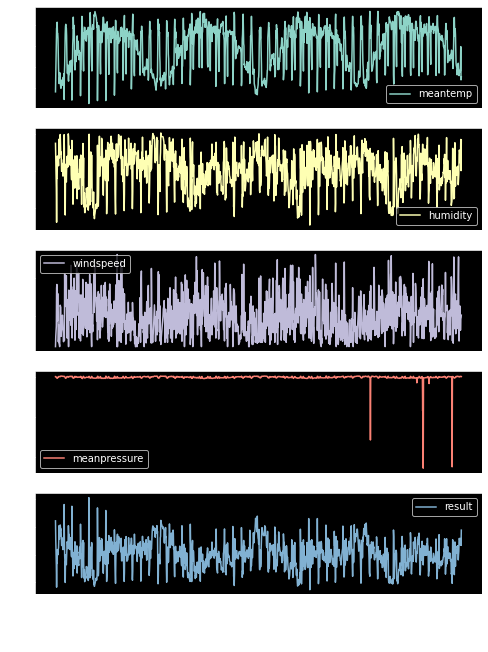

In [31]:
Plotter.plot_line(df)

In [33]:
# <halerium id="c9f23d08-4d4f-44d1-ae91-6bb801a365ec">
export_path = './cleaned_data.csv'
# </halerium id="c9f23d08-4d4f-44d1-ae91-6bb801a365ec">

df.to_csv(export_path)